In [1]:
# MonStim_CSV_Analysis - main.py
from monstim_converter import pickle_data  # noqa: F401
from monstim_analysis import EMGData,EMGDataset
from monstim_utils import DATA_PATH, OUTPUT_PATH, SAVED_DATASETS_PATH # noqa: F401

#Process CSVs into Pickle files: 'files_to_analyze' --> 'output'
# pickle_data(DATA_PATH, OUTPUT_PATH)

# Create dictionaries of Pickle datasets and single sessions that are in the 'output' directory.
dataset_dict, datasets = EMGData.unpackPickleOutput(OUTPUT_PATH)
for idx, dataset in enumerate(datasets):
    print(f'dataset index {idx}: {dataset}')

#"""### Things to work on: ###
    # 1) More functions for dataset analysis:
        # each session should bring in and reference it's own parameters like scan rate, m/h-start/end, 
    # 2) Add function to EMGSession class: area under the curve for reflexes
    # 3) Add function to EMGSession class: frequency/power analysis for tremor, noise, or movement.
    # 5) Create EMGExperiment class that can hold and analyze multiple datasets (across-animal analysis).
        # Each dataset will carry in its own parameters like animal ID, M/H start/end, M/H duration, M/H max, etc.
    # 6) Fix manual_mmax implementation. It's not working properly. Should be a list of floats (for each channel) instead of a single float."""

dataset index 0: 240718 C283.8 WT iso post-dec mcurve +_wt40
dataset index 1: 240718 C283.8 WT iso post-dec mcurve -
dataset index 2: 240718 C283.8 WT iso post-dec mcurve - long


In [2]:
# Define dataset of interest for downstream analysis.
dataset_idx = 0
sessions_to_exclude = []

dataset_oi = EMGDataset.dataset_from_dataset_dict(dataset_dict, datasets, dataset_idx, sessions_to_exclude, temp=True)

# dataset_oi.dataset_parameters()

Session ID: wt40
# of Channels: 2
Scan Rate (Hz): 100000.0
Samples/Channel: 110000.0
Pre-Stim Acq. time (ms): 100.0
Post-Stim Acq. time (ms): 900.0
Stimulus Delay (ms): 0.0
Stimulus Duration (ms): 0.1
Stimulus Interval (s): 5.0
EMG Amp Gains: [1000, 1000]
Window start: 99.0; Window end: 107.0


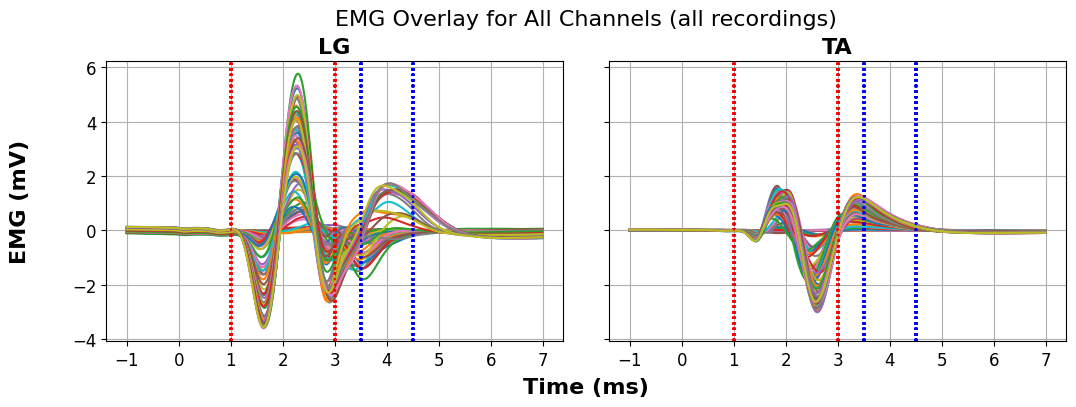

Window start: 99.0; Window end: 107.0


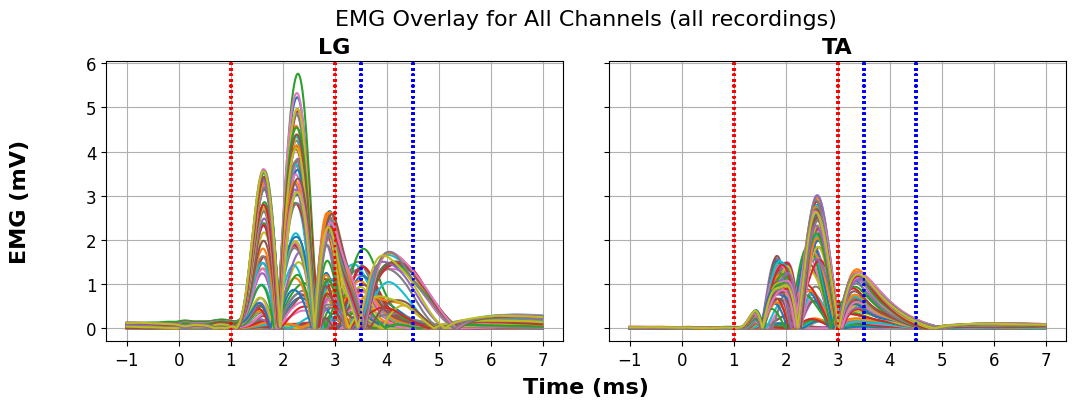

In [3]:
# Define session of interest for downstream analysis.
session_idx = 0
session_oi = dataset_oi.get_session(session_idx)

# Display session parameters.
session_oi.session_parameters()

# Set channel names for plotting.
# channel_names = ["LG", "TA"]
# channel_names = ["LG"]

# Visualize single EMG session raw and filtered
session_oi.plot(plot_type = 'emg', m_flags=True, h_flags=True, data_type='filtered')
# session_oi.plot(plot_type = 'emg', channel_names=channel_names, m_flags=True, h_flags=True, data_type='raw')
session_oi.plot(plot_type = 'emg', m_flags=True, h_flags=True, data_type='rectified_filtered')
# session_oi.plot(plot_type = 'emg', channel_names=channel_names, m_flags=True, h_flags=True, data_type='rectified_raw')

Window start: 99.0; Window end: 107.0


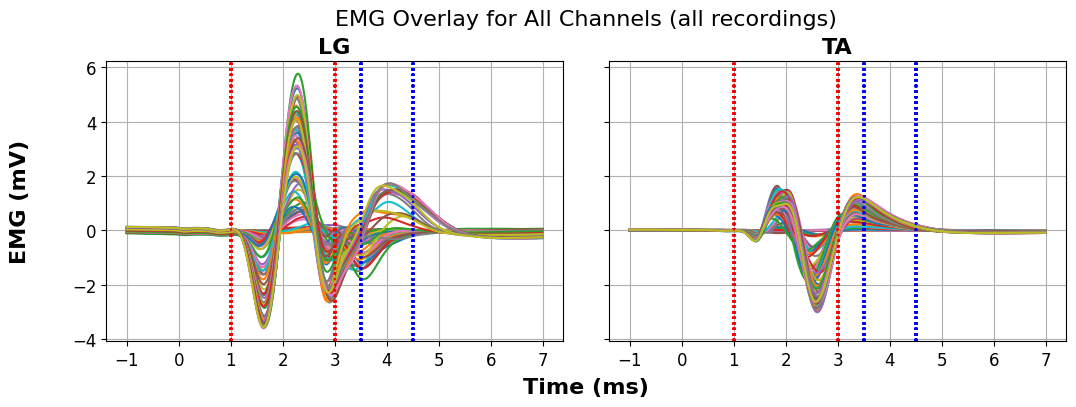

In [4]:
# Use the update_window_settings method to temporarily change the reflex window settings and then replot.
# session_oi.update_window_settings()
session_oi.plot(plot_type = 'emg', m_flags=True, h_flags=True, data_type='filtered')

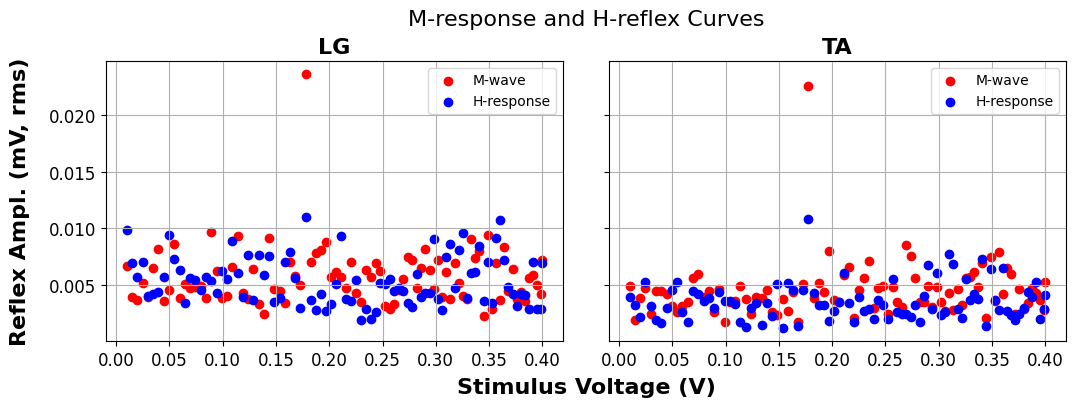

UnableToPlotError: M-max could not be calculated for channel 0.

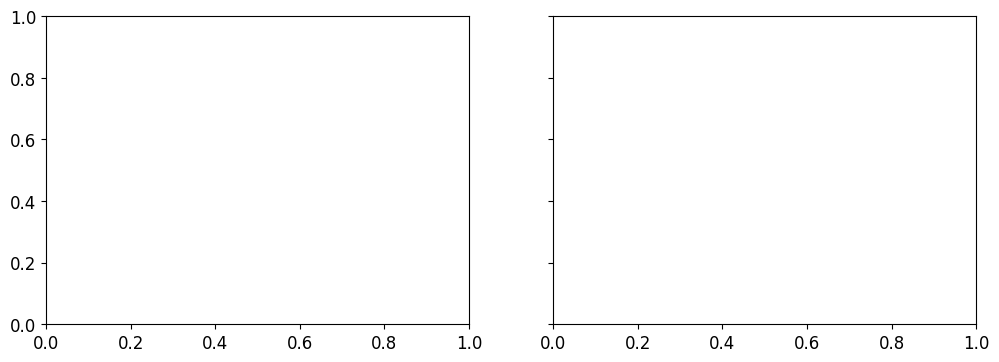

In [5]:
# Inspect reflex curves and suspected H-reflex trials with these methods.
session_oi.plot(plot_type='reflexCurves')
session_oi.plot(plot_type='reflexCurves', relative_to_mmax=True)

- LG: M-max amplitude = 1.70 V
- TA: M-max amplitude = 0.55 V
Plateau region detected with window size 15. Threshold: 0.2 times SD.
	M-max corrected by: 0.08556616306304932
	M-max amplitude: 1.7001286745071411
Plateau region detected with window size 15. Threshold: 0.2 times SD.
	M-max corrected by: 0.1031329333782196
	M-max amplitude: 0.552686870098114


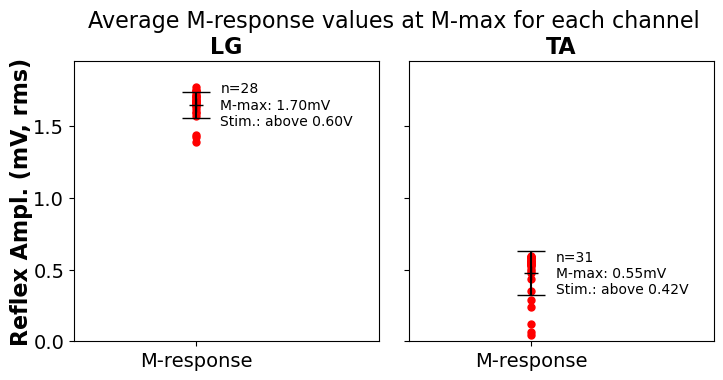

In [ ]:
# M-max analysis
session_oi.m_max_report()
session_oi.plot(plot_type = 'mmax')

Plateau region detected with window size 15. Threshold: 0.2 times SD.
	M-max corrected by: 0.25328993797302246
	M-max amplitude: 2.335611343383789
Plateau region detected with window size 15. Threshold: 0.2 times SD.
	M-max corrected by: 0.07912272214889526
	M-max amplitude: 0.6316541433334351


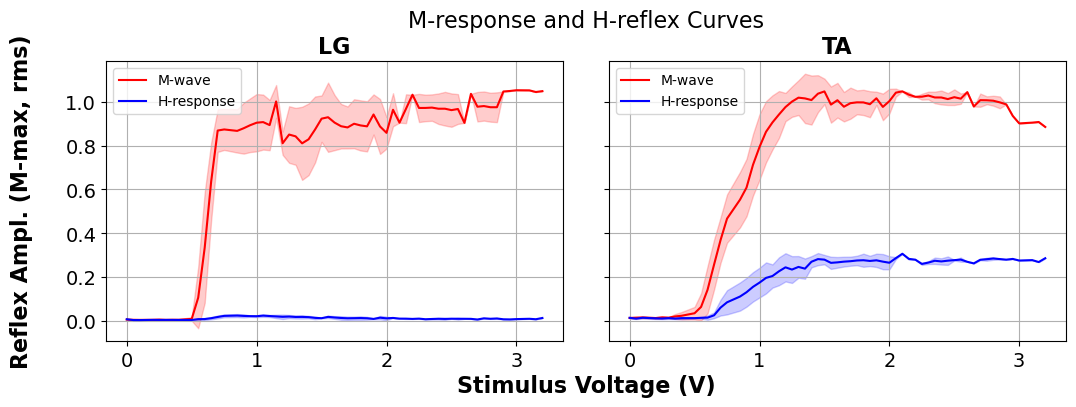

In [ ]:
# Visualize the entire dataset's avereaged reflex curves with these methods of the dataset object.
dataset_oi.plot(plot_type = 'reflexCurves', relative_to_mmax=True, mmax_report=True)

Plateau region detected with window size 15. Threshold: 0.2 times SD.
	M-max corrected by: 0.25328993797302246
	M-max amplitude: 2.335611343383789
Plateau region detected with window size 15. Threshold: 0.2 times SD.
	M-max corrected by: 0.07912272214889526
	M-max amplitude: 0.6316541433334351


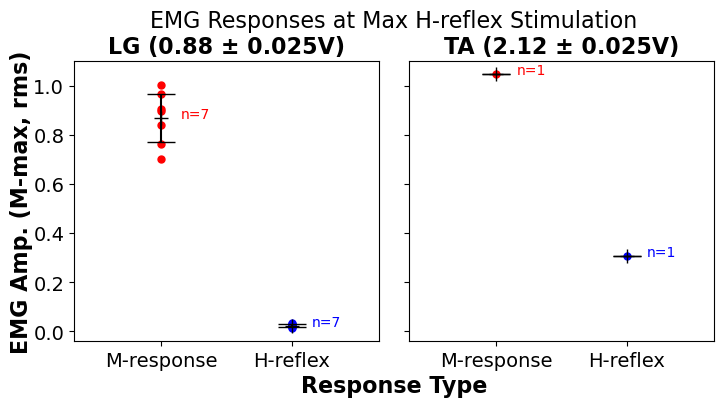

In [ ]:
# Visualize the entire dataset's avereaged reflex values at H-max with this method of the dataset object.
dataset_oi.plot(plot_type = 'maxH', relative_to_mmax=True)